# Loading the data set & Exploratory Data Analysis

In [1]:
# Import the required libraries
import os

def read_files(file_path):
   with open(file_path, 'r') as file:
      return file.read()
        
def read_folder(folder_path):
    files=[]
    # Change the directory
    os.chdir(folder_path)
    # Iterate over all the files in the directory
    for file in os.listdir():
        if file.endswith('.txt'):
            # Create the filepath of particular file
            file_path =f"{folder_path}/{file}"
            files.append(read_files(file_path))
    return files
        
# Define the location of the directory
neg=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/neg/")
pos=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/pos/")



In [2]:
print(len(neg))

1000


In [3]:
print(pos[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from nltk.stem import PorterStemmer
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity  
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
from textblob import Word
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Prepare  Data

In [7]:
neg_data=[]
for i in neg:
    temp=[]
    temp.append(i)
    temp.append(0)
    neg_data.append(temp)

print(neg_data[0])

['plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [8]:
pos_data=[]
for i in pos:
    temp=[]
    temp.append(i)
    temp.append(1)
    pos_data.append(temp)

print(pos_data[0])

['films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this see

In [9]:
print(len(neg_data))

1000


In [10]:
print(len(pos_data))

1000


In [11]:
data=pos_data+neg_data
np.random.shuffle(data)
print(len(data))

2000


In [12]:
data=pd.DataFrame(data,columns=['review','label'])

In [13]:
print(data.head(10))

                                              review  label
0  being that it is a foreign language film with ...      1
1  a slight romantic comedy with a feminist bent ...      0
2  the 1990s produced two brilliant science ficti...      1
3  before even seeing a single frame of the film ...      1
4  today , war became a reality to me after seein...      1
5   " the animal " is a marginally inspired comed...      0
6  pollock starring ed harris , marcia gay harden...      1
7  contrary to the title , " the boxer " is not a...      1
8  the thirteenth floor , the third in what i wou...      1
9  note : some may consider portions of the follo...      1


In [14]:
print(data.iloc[0].review)

being that it is a foreign language film with no known names with a select number theaters showing it , " shall we dance " won't be seen by that many people . 
and that's a shame - this is a funny , enchanting , and goofy movie full of laughs , surprises , and wonderful dance sequences . 
the surprising thing about " shall we dance " is the universal appeal of the story . 
a us version is in the works , and it's no wonder - it's not really all that culture specific . 
although there is a narrated set-up that adds some extra resonance to the proceedings ( about the view the japanese culture has about ballroom dancing ) , the movie is so rich in character and appeal that this added layer isn't at all necessary to understand or enjoy the film . 
the only important unexplained japanese-specific reference that may leave some a bit puzzled is that 1000 yen is roughly $10 ( when you see the film - and you should see this film - you'll know why ) . 
a middle aged company man realizes that achi

# ***Data Exploration***

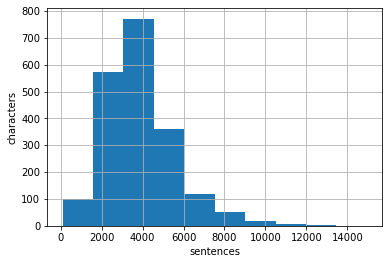

In [15]:
# take a look at the number of characters present in each sentence. This can give us a rough idea about the reviews length.
data['review'].str.len().hist()
plt.xlabel("sentences")
plt.ylabel("characters")
plt.show()

The histogram shows that reviews range from 100 to 12000 characters and generally, it is between 20000 to 70000 characters.

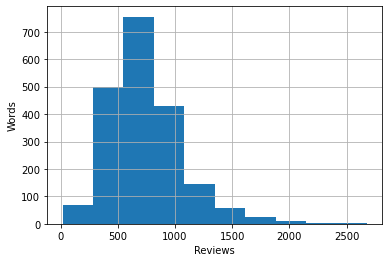

In [16]:
# plot the number of words appearing in each review.
data['review'].str.split().map(lambda x: len(x)).hist()
plt.xlabel("Reviews")
plt.ylabel("Words")
plt.show()

It is clear that the number of words in each review ranges from 2 to 2000 and mostly falls between 250 to 1500 words.

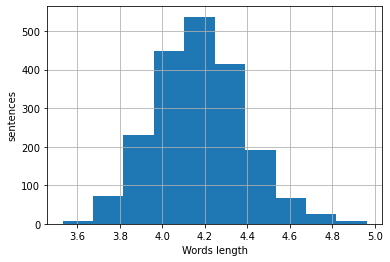

In [17]:
#check the average word length in each sentence.

data['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.ylabel("sentences")
plt.xlabel("Words length")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


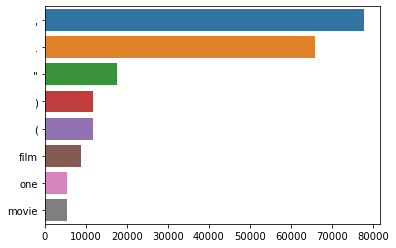

In [18]:
# Most common sentences in data that are not stop words.
from collections import  Counter
import seaborn as sns

nltk.download('stopwords')
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(data['review'])

In [19]:
# N-gram exploration with n = 2,3

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

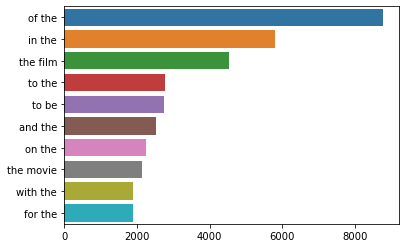

In [20]:
# N-gram exploration with n = 2
top_n_bigrams = get_top_ngram(data['review'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

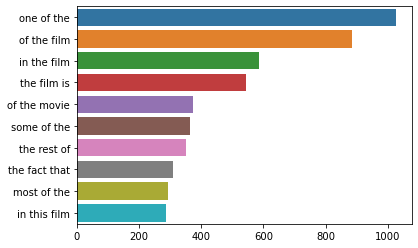

In [21]:
# N-gram exploration with n = 3
top_tri_grams=get_top_ngram(data['review'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Data Preprocessing


* Case Normalization
* Remove Stopwords
* Stemming & Lemmatization
* Text Cleaning


In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"'s", " ", text)
    text = re.sub(r"'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"'re", " are ", text)
    text = re.sub(r"'d", " would ", text)
    text = re.sub(r"'ll", " will ", text)
    text = re.sub(r"--", "", text)
    text = re.sub("[^a-zA-Z ]", "" , text)
    text = text.strip(' ')
   
    return text

In [23]:
#pre processing steps like lower case, 
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

print("\nData after splitting :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after splitting :
 being that it is a foreign language film with no known names with a select number theaters showing it , " shall we dance " won't be seen by that many people . and that's a shame - this is a funny , enchanting , and goofy movie full of laughs , surprises , and wonderful dance sequences . the surprising thing about " shall we dance " is the universal appeal of the story . a us version is in the works , and it's no wonder - it's not really all that culture specific . although there is a narrated set-up that adds some extra resonance to the proceedings ( about the view the japanese culture has about ballroom dancing ) , the movie is so rich in character and appeal that this added layer isn't at all necessary to understand or enjoy the film . the only important unexplained japanese-specific reference that may leave some a bit puzzled is that 1000 yen is roughly $10 ( when you see the film - and you should see this film - you'll know why ) . a middle aged company man

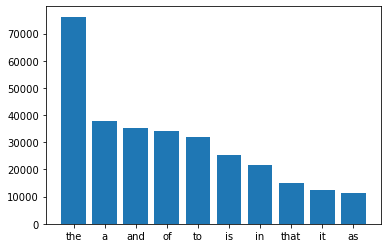

In [24]:
#plot stop words
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(data['review'])

In [25]:
#remove stop words
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print("\nData after remove stop words :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after remove stop words :
 foreign language film known names select number theaters showing , " shall dance " seen many people . that's shame - funny , enchanting , goofy movie full laughs , surprises , wonderful dance sequences . surprising thing " shall dance " universal appeal story . us version works , wonder - really culture specific . although narrated set-up adds extra resonance proceedings ( view japanese culture ballroom dancing ) , movie rich character appeal added layer necessary understand enjoy film . important unexplained japanese-specific reference may leave bit puzzled 1000 yen roughly $10 ( see film - see film - know ) . middle aged company man realizes achieving goals set life ( house , child , good marriage ) still translate fulfilled life . glimpsing melancholy beauty looking dance studio window train home work , sugiyana ( koji yakusho ) decides trepidation take ballroom dance lessons order meet woman stirred something . finding weekly fees private lessons el

In [26]:
# stemming && lemma
st = PorterStemmer()
data['review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['review'] =data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("\nData after stemming :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after stemming :
 foreign languag film known name select number theater show , " shall danc " seen mani peopl . that' shame - funni , enchant , goofi movi full laugh , surpris , wonder danc sequenc . surpris thing " shall danc " univers appeal stori . u version work , wonder - realli cultur specif . although narrat set-up add extra reson proceed ( view japanes cultur ballroom danc ) , movi rich charact appeal ad layer necessari understand enjoy film . import unexplain japanese-specif refer may leav bit puzzl 1000 yen roughli $10 ( see film - see film - know ) . middl age compani man realiz achiev goal set life ( hous , child , good marriag ) still translat fulfil life . glimps melancholi beauti look danc studio window train home work , sugiyana ( koji yakusho ) decid trepid take ballroom danc lesson order meet woman stir someth . find weekli fee privat lesson eleg beauti mai ( tamiyo kusakari ) rich blood , sugiyama opt group lesson simpli near . meet player gem movi , reason joi

In [27]:
# clean text
data['review'] = data['review'].map(lambda com : clean_text(com))
print("\nData after clean text :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))




Data after clean text :
 foreign languag film known name select number theater show   shall danc  seen mani peopl  that shame  funni  enchant  goofi movi full laugh  surpris  wonder danc sequenc  surpris thing  shall danc  univers appeal stori  u version work  wonder  realli cultur specif  although narrat setup add extra reson proceed  view japanes cultur ballroom danc   movi rich charact appeal ad layer necessari understand enjoy film  import unexplain japanesespecif refer may leav bit puzzl  yen roughli   see film  see film  know   middl age compani man realiz achiev goal set life  hous  child  good marriag  still translat fulfil life  glimps melancholi beauti look danc studio window train home work  sugiyana  koji yakusho  decid trepid take ballroom danc lesson order meet woman stir someth  find weekli fee privat lesson eleg beauti mai  tamiyo kusakari  rich blood  sugiyama opt group lesson simpli near  meet player gem movi  reason join class  later  meet aoki danc studio  naoto ta

In [28]:
new_data=data

In [29]:
print(new_data.count)

<bound method DataFrame.count of                                                  review  label
0     foreign languag film known name select number ...      1
1     slight romant comedi feminist bent  one edg  t...      0
2     produc two brilliant scienc fiction film  one ...      1
3     even see singl frame film  would easi snicker ...      1
4     today  war becam realiti see screen save priiv...      1
...                                                 ...    ...
1995  everi  except famili film come along  attempt ...      1
1996  back  dreamwork unveil first comput anim movi ...      1
1997  wait train station near begin furi  joe say  a...      1
1998  damn trailer  advertis film  reveal far much c...      1
1999  deserv recognit  achiev nearimposs task make g...      0

[2000 rows x 2 columns]>


In [30]:
print(new_data.iloc[3].review)

even see singl frame film  would easi snicker deep impact  comet collis cours earth threaten exist life planet  latest entri decade dubiou reviv  disast film  first two  sky fall  flick hit screen year  come july armageddon  meteor threat   taglin   ocean rise  citi fall  hope surviv  cornbal utterli ridicul collaps tunnel thriller daylight   came alon    way    togeth    everi bit treacli  open moment deep impact offer snicker  cheesi confin disast movi convent  usual open  roll call   major charact person problem introduc  promin  person  stori ambiti tv news report jenni lerner  tea leoni   distraught father  maximilian schell  left mother  vanessa redgrav  younger woman  rya kihlstedt   snickerworthi coventur paramount dreamwork skg aggress push anoth highprofil corpor collabor  microsoft nbc cabl news network msnbc  employ jenni  film ostens main charact  vision america present  msnbc televis news sourc choic everi home  realiti reach fraction countri  initi sign point toward some

# Word Cloud

In [31]:
#!pip install wordcloud

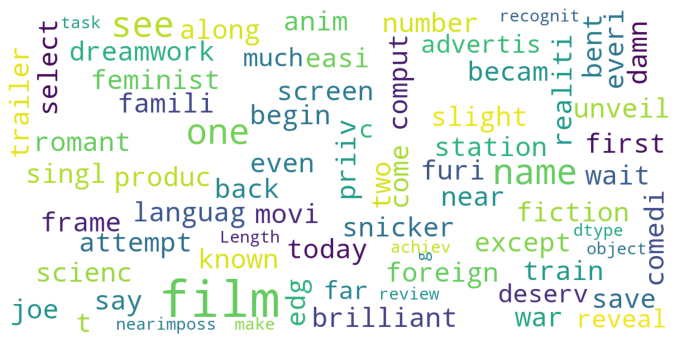

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['review'])

## Split Data

In [33]:
#Splitting data into train and validation
from sklearn import model_selection
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(new_data['review'],new_data['label'])

In [34]:
print(type(train_x))

<class 'pandas.core.series.Series'>


In [35]:
print(len(train_x))

1500


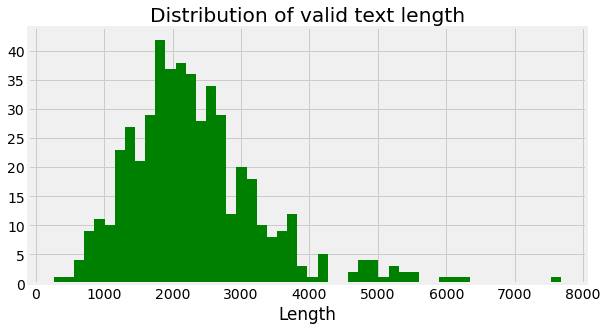

In [36]:
plt.figure(figsize=(10,16))
plt.style.use('fivethirtyeight')

# plt.subplot(3,1,1)
# train_len = [len(train_x.iloc[i]) for i in range(0,len(train_x))]
# plt.hist(train_len,bins=50)
# plt.title('Distribution of train text length')
# plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(valid_x.iloc[l]) for l in range(0,len(valid_x))]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.show()

In [37]:
print(train_x.shape)

(1500,)


In [38]:
print(valid_x.shape)

(500,)


In [39]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', max_features=6000)
tfidf_vect.fit(data['review'].tolist())
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


In [40]:
print(xtrain_tfidf.shape)

(1500, 6000)


In [41]:
print(xvalid_tfidf.shape)

(500, 6000)


In [42]:
print(tfidf_vect.get_feature_names()[:20])

['aaron', 'abandon', 'abbi', 'abil', 'abl', 'aboard', 'abort', 'abound', 'abraham', 'absenc', 'absent', 'absolut', 'absorb', 'absurd', 'abund', 'abus', 'abyss', 'academ', 'academi', 'accent']


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
print(xtrain_tfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(xtrain_tfidf)

  (0, 5971)	0.07670210330822358
  (0, 5958)	0.026413763354545736
  (0, 5946)	0.039594686629754766
  (0, 5943)	0.07526695927086954
  (0, 5941)	0.05531764281650878
  (0, 5933)	0.014952716635464169
  (0, 5932)	0.09720220948146335
  (0, 5923)	0.08300208984712673
  (0, 5912)	0.030737551770547756
  (0, 5907)	0.3330382000922582
  (0, 5862)	0.029465651496544957
  (0, 5823)	0.06420022129600655
  (0, 5822)	0.036656384935217834
  (0, 5814)	0.01433935134398339
  (0, 5808)	0.03410791820037325
  (0, 5799)	0.033785643847919114
  (0, 5793)	0.055922087086521646
  (0, 5731)	0.025761017443141458
  (0, 5727)	0.02754810008975573
  (0, 5726)	0.05335703093581973
  (0, 5684)	0.05000267042611784
  (0, 5639)	0.052701980465322706
  (0, 5636)	0.044858986540820135
  (0, 5562)	0.02948699308023322
  (0, 5535)	0.042187084698304685
  :	:
  (1499, 1512)	0.5183418101966687
  (1499, 1497)	0.04752144281866509
  (1499, 1332)	0.05342096789319472
  (1499, 1302)	0.04742531837565497
  (1499, 1155)	0.107593619845152
  (1499, 11

# Model Training and testing

In [45]:
def plot_confusion_matrix(valid_y,predictions):
    import seaborn as sns
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                metrics.confusion_matrix(valid_y,predictions).flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     metrics.confusion_matrix(valid_y,predictions).flatten()/np.sum(metrics.confusion_matrix(valid_y,predictions))]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(metrics.confusion_matrix(valid_y,predictions), annot=labels,annot_kws={'size': 10}, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.

    plt.show()
    



In [46]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [47]:
Model_Names=[]
Model_Accuarcy=[]

In [48]:
def train_model(classifier, xtrain_tfidf, train_y, xvalid_tfidf,valid_y ):
    print(classifier)
    classifier.fit(xtrain_tfidf, train_y)
    predictions = classifier.predict(xvalid_tfidf)
    accuracy= metrics.accuracy_score(predictions, valid_y)
    print ("Accuracy: ", accuracy)
    #Evaluation: Confusion matrix and Precision and Recall

#     print("Confusion matrix:",metrics.confusion_matrix(valid_y,predictions))
#     print(" report:",metrics.classification_report(valid_y,predictions))
    
    Check=True
    for x in Model_Names:
        if x==str(classifier):
            Check=False
    if Check:
        # fit the training dataset on the classifier
        Model_Names.append(str(classifier))
        Model_Accuarcy.append(accuracy)
    plot_confusion_matrix(predictions, valid_y)
    
    return classifier
    

LogisticRegression(C=2.0)
Accuracy:  0.842


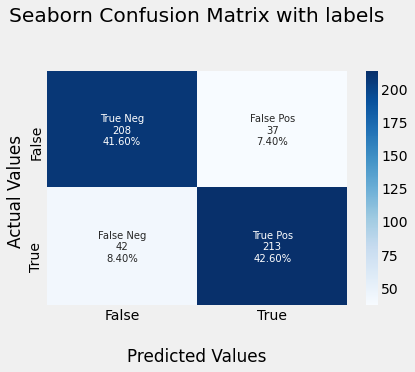

In [49]:
#print("LogisticRegression with default values(penalty='l2', C=2.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=2.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')
LogisticRegression(C=10.0)
Accuracy:  0.844


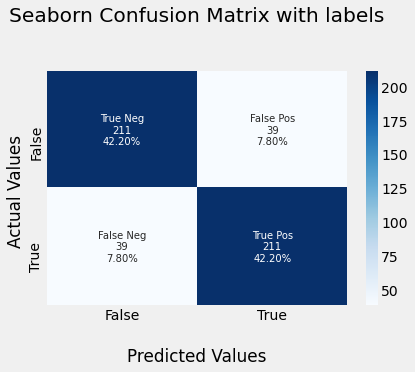

In [50]:
print("LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=10.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')
LogisticRegression(C=15.0)
Accuracy:  0.838


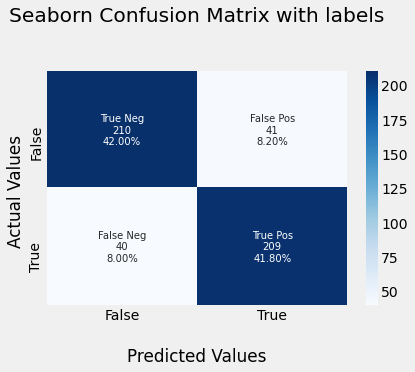

In [51]:
print("LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=15.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=2.0)
LogisticRegression(C=2.0, solver='newton-cg')
Accuracy:  0.842


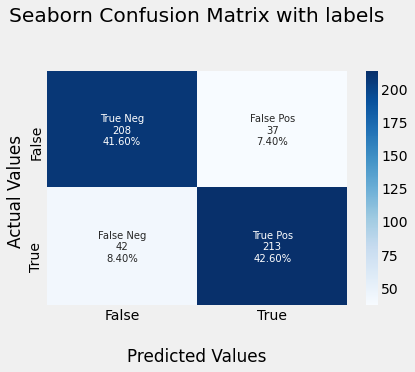

In [52]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=2.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=2.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=13.0)
LogisticRegression(C=13.0, solver='newton-cg')
Accuracy:  0.84


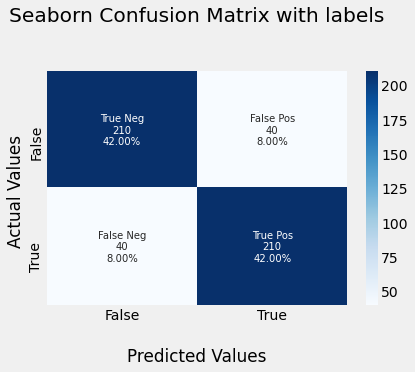

In [53]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=13.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=13.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=10.0)
LogisticRegression(C=10.0, solver='newton-cg')
Accuracy:  0.844


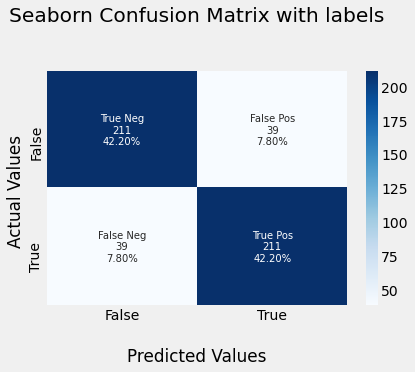

In [54]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=10.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=10.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LinearSVC()
Accuracy:  0.838


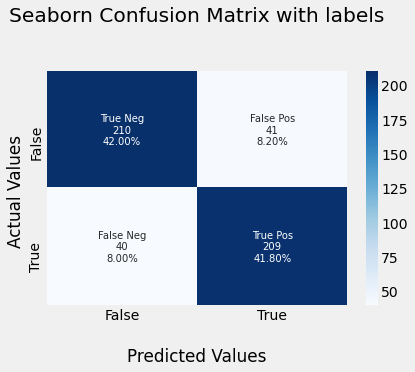

In [55]:
from sklearn.svm import LinearSVC
#LinearSVC()
classifier=train_model(LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


KNeighborsClassifier(n_neighbors=3)
Accuracy:  0.688


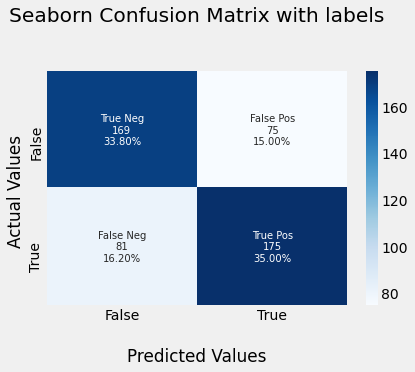

In [56]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=3), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


KNeighborsClassifier(n_neighbors=7)
Accuracy:  0.684


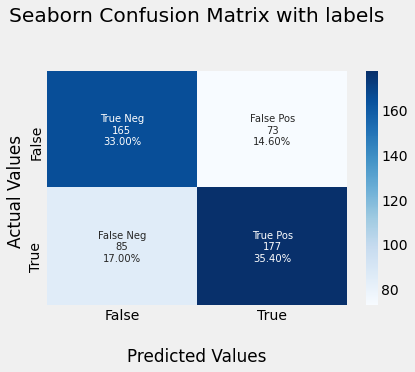

In [57]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=7), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


RandomForestClassifier(n_estimators=150)
Accuracy:  0.822


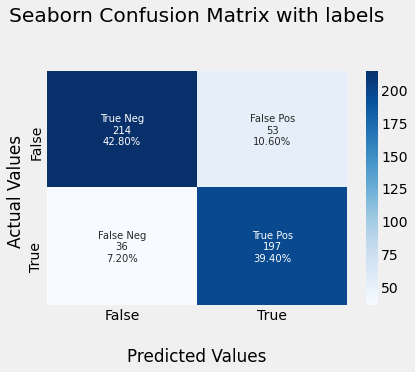

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier=train_model(RandomForestClassifier(n_estimators=150), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


SGDClassifier(max_iter=6)
Accuracy:  0.82


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


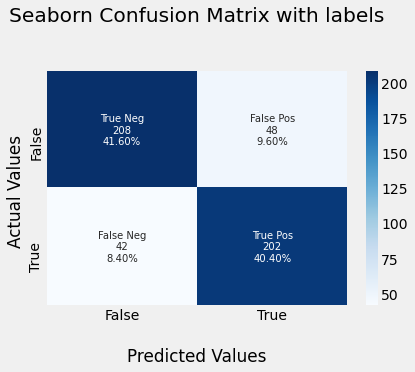

In [59]:
# SGDClassifier trained with the hinge loss, equivalent to a linear SVM.

from sklearn.linear_model import SGDClassifier
classifier=train_model(SGDClassifier(loss="hinge", penalty="l2", max_iter=6), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


# LSTM CNN Classification

In [60]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [61]:
df=new_data
Y = df['label'].values

In [62]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['review'], Y, test_size=0.33)

In [63]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [64]:
from keras.models import Sequential
from keras.layers import LSTM


In [65]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 26895 unique tokens.


In [66]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1340, 1331)


In [67]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (660, 1331)


In [68]:
# Create the model

# We get to choose embedding dimensionality
D = 20
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [69]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=6,
  validation_data=(data_test, Ytest)
)

Model_Names.append('CNN_Sequential_Binary_Classification')
Model_Accuarcy.append(max(r.history['val_accuracy']))

Training model...
Epoch 1/6
42/42 [==============================] - 5s 84ms/step - loss: 0.6970 - accuracy: 0.4858 - val_loss: 0.6935 - val_accuracy: 0.4833
Epoch 2/6
42/42 [==============================] - 3s 73ms/step - loss: 0.6882 - accuracy: 0.5284 - val_loss: 0.6953 - val_accuracy: 0.4833
Epoch 3/6
42/42 [==============================] - 3s 73ms/step - loss: 0.6755 - accuracy: 0.6358 - val_loss: 0.6845 - val_accuracy: 0.5258
Epoch 4/6
42/42 [==============================] - 3s 73ms/step - loss: 0.5779 - accuracy: 0.7067 - val_loss: 0.5763 - val_accuracy: 0.6818
Epoch 5/6
42/42 [==============================] - 3s 76ms/step - loss: 0.1412 - accuracy: 0.9590 - val_loss: 0.8016 - val_accuracy: 0.7152
Epoch 6/6
42/42 [==============================] - 3s 80ms/step - loss: 0.0113 - accuracy: 0.9993 - val_loss: 0.6394 - val_accuracy: 0.7545


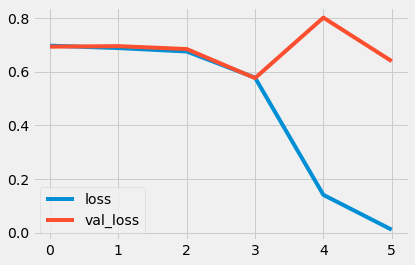

In [70]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

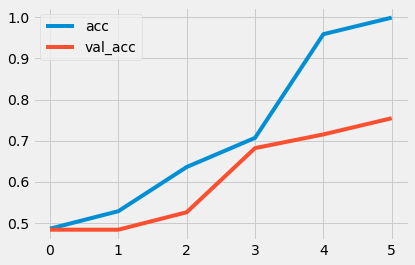

In [71]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Data Visualization:

In [72]:
import pandas as pd
dataframe=pd.DataFrame(Model_Names,columns=['Model']) 
dataframe['Accuracy']=Model_Accuarcy
dataframe.head()

,Model,Accuracy
0,LogisticRegression(C=2.0),0.842
1,LogisticRegression(C=10.0),0.844
2,LogisticRegression(C=15.0),0.838
3,"LogisticRegression(C=2.0, solver='newton-cg')",0.842
4,"LogisticRegression(C=13.0, solver='newton-cg')",0.840


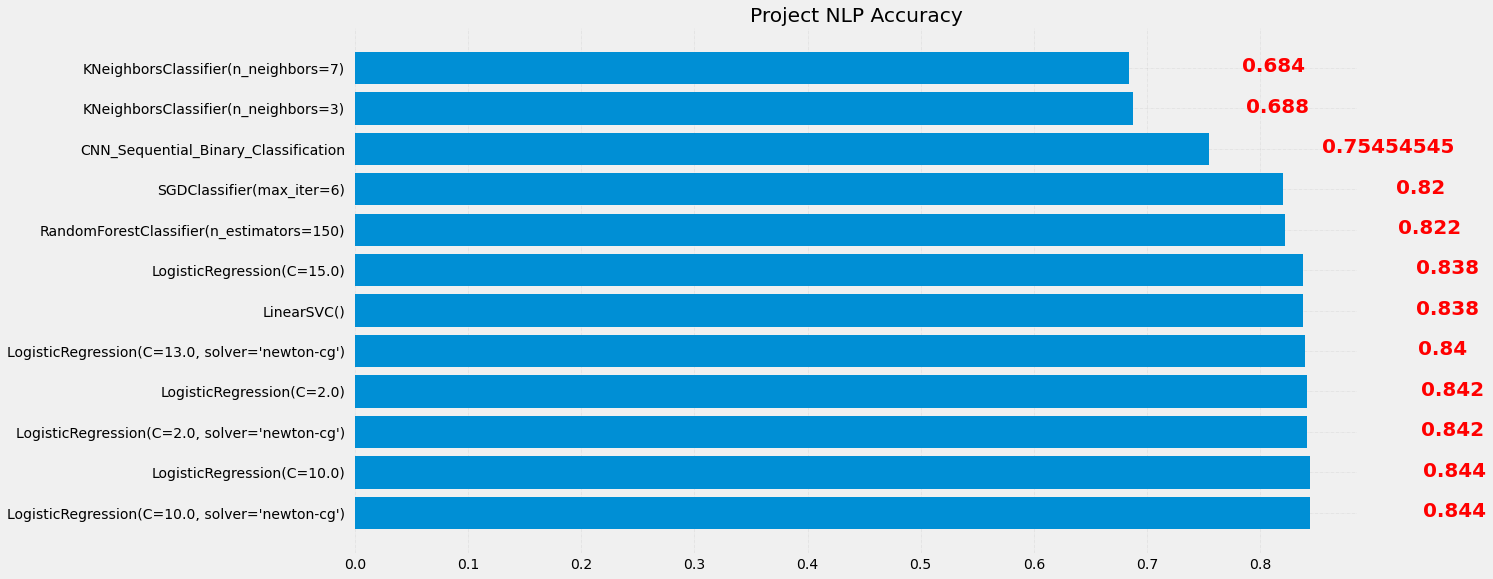

In [74]:
#Figure Size
data_sorted = dataframe.sort_values(by='Accuracy', ascending=True)
dataframe=data_sorted
name=dataframe['Model']
acc=dataframe['Accuracy']

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, acc)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5,
             str(round((i.get_width()), 9)),
             fontsize = 20, fontweight ='bold',
             color ='red')
 
# Add Plot Title
ax.set_title('Project NLP Accuracy',
             loc ='center', )
# Show Plot
plt.show()